In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/kedeisha1/Challenges/main/netflix_titles.csv')


In [3]:
# Checking the top 5 rows of data
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
# checking the rows, column names and data types info of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
# Question 1 - checking the null values
data.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [7]:
# There are some null values in the few columns , lets check if the null values in a column are more than 5% 
# of the total data or if it is less than 5% (if it is less than 5% we can drop the rows)

Threshold = len(data) * 0.05 # caluculating the threshold limit at 5%
print(Threshold)


440.35


In [10]:
# Check columns which have less than 5% of null values, so that we can drop the null values

col_to_be_dropped = data.columns[(data.isna().sum() > 0) & (data.isna().sum() <= Threshold)]
print(col_to_be_dropped)

Index(['date_added', 'rating', 'duration'], dtype='object')


In [11]:
# lets drop the null values less than 5%
data.dropna(subset = col_to_be_dropped, inplace = True)

In [13]:
data.isna().sum() # check the data again

show_id            0
type               0
title              0
director        2621
cast             825
country          829
date_added         0
release_year       0
rating             0
duration           0
listed_in          0
description        0
dtype: int64

In [14]:
print(data[['director','cast','country']].nunique())

director    4526
cast        7678
country      748
dtype: int64


In [15]:
# removing the duplicate data
data = data.drop_duplicates()

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8790 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      6169 non-null   object
 4   cast          7965 non-null   object
 5   country       7961 non-null   object
 6   date_added    8790 non-null   object
 7   release_year  8790 non-null   int64 
 8   rating        8790 non-null   object
 9   duration      8790 non-null   object
 10  listed_in     8790 non-null   object
 11  description   8790 non-null   object
dtypes: int64(1), object(11)
memory usage: 892.7+ KB


In [17]:
data.isnull().sum()

show_id            0
type               0
title              0
director        2621
cast             825
country          829
date_added         0
release_year       0
rating             0
duration           0
listed_in          0
description        0
dtype: int64

In [19]:
print(data['director'].value_counts())

Rajiv Chilaka                     19
Raúl Campos, Jan Suter            18
Marcus Raboy                      16
Suhas Kadav                       16
Jay Karas                         14
                                  ..
Raymie Muzquiz, Stu Livingston     1
Joe Menendez                       1
Eric Bross                         1
Will Eisenberg                     1
Mozez Singh                        1
Name: director, Length: 4526, dtype: int64


In [21]:
print(data['country'].value_counts())

United States                             2809
India                                      972
United Kingdom                             418
Japan                                      243
South Korea                                199
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: country, Length: 748, dtype: int64


In [22]:
# looking at data info , date_added column is an object , lets change it to date time format

data['date_added'] = pd.to_datetime(data['date_added'], errors='coerce')




In [23]:
data.info() # checking the type of recently changed date column

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8790 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8790 non-null   object        
 1   type          8790 non-null   object        
 2   title         8790 non-null   object        
 3   director      6169 non-null   object        
 4   cast          7965 non-null   object        
 5   country       7961 non-null   object        
 6   date_added    8790 non-null   datetime64[ns]
 7   release_year  8790 non-null   int64         
 8   rating        8790 non-null   object        
 9   duration      8790 non-null   object        
 10  listed_in     8790 non-null   object        
 11  description   8790 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 892.7+ KB


In [24]:
# Question - 2 - Using the ‘date_added’ column a new column called ‘year_added’ that 
# only has the year the title was added.

data['year_added'] = data['date_added'].dt.year

In [25]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021


In [27]:
# Question - 3 - Using the ‘date_added’ column a new column called ‘month_added’ that only has 
# the month the title was added.

data['month_added'] = data['date_added'].dt.month

In [28]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,9
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,9
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,9
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,9


In [29]:
# Question - 4- Check the data types. Anything look odd? Adjust accordingly.

data.info() # Checking the data type 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8790 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8790 non-null   object        
 1   type          8790 non-null   object        
 2   title         8790 non-null   object        
 3   director      6169 non-null   object        
 4   cast          7965 non-null   object        
 5   country       7961 non-null   object        
 6   date_added    8790 non-null   datetime64[ns]
 7   release_year  8790 non-null   int64         
 8   rating        8790 non-null   object        
 9   duration      8790 non-null   object        
 10  listed_in     8790 non-null   object        
 11  description   8790 non-null   object        
 12  year_added    8790 non-null   int64         
 13  month_added   8790 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(10)
memory usage: 1.0+ MB


In [32]:
data.isnull().sum()

show_id            0
type               0
title              0
director        2621
cast             825
country          829
date_added         0
release_year       0
rating             0
duration           0
listed_in          0
description        0
year_added         0
month_added        0
dtype: int64

In [33]:
# replacing null value with blanks
data.fillna('',inplace = True)

2018    1146
2017    1030
2019    1030
2020     953
2016     901
Name: release_year, dtype: int64


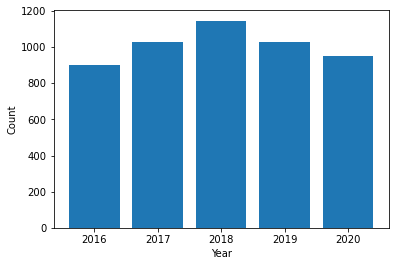

In [97]:
# Question - 5 - What is the most popular release year for movies on Netflix?

release_year = data['release_year'].value_counts().sort_values(ascending = False).head(5)
print(release_year)

plt.bar(release_year.index, release_year.values)
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

2019    2016
2020    1879
2018    1648
2021    1498
2017    1185
Name: year_added, dtype: int64


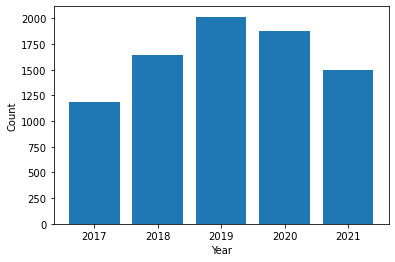

In [94]:
# Question 6 - What year did Netflix add the most content to its platform?
most_content_year= data['year_added'].value_counts().sort_values(ascending = False).head(5)
print(most_content_year)

plt.bar(most_content_year.index, most_content_year.values)
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

In [49]:
# Question 7 - What is the movie with the longest title in the dataset?

movies = data[data['type'] == 'Movie']

movie_with_longest_title = movies.loc[movies['title'].str.len().idxmax()]

print(movie_with_longest_title['title'])

Jim & Andy: The Great Beyond - Featuring a Very Special, Contractually Obligated Mention of Tony Clifton


In [50]:
# Question 7 - What are the top 5 most popular movie genres?

data['listed_in'].nunique()


513

In [51]:
movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,9
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,2021,9
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021,9
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,2021,9
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,2021,9


In [86]:
# Question 8 - What are the top 5 most popular movie genres?

result = movies.groupby('listed_in')['type'].count().sort_values(ascending = False).head(5)
print(result)

listed_in
Dramas, International Movies                        362
Documentaries                                       359
Stand-Up Comedy                                     334
Comedies, Dramas, International Movies              274
Dramas, Independent Movies, International Movies    252
Name: type, dtype: int64


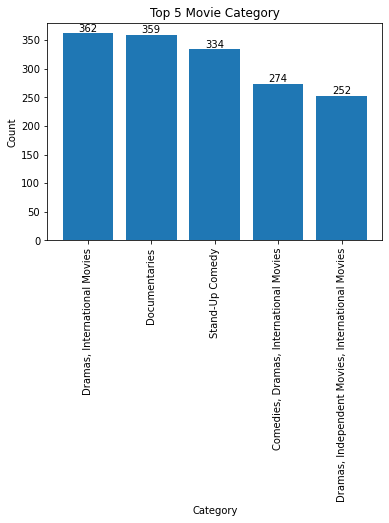

In [89]:
plt.bar(result.index, result.values)
for i, v in enumerate(result.values):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Top 5 Movie Category')
plt.xticks(rotation = 90)
plt.show()

In [80]:
# Question 9 - Create a pie chart visualizing the proportion of movies vs TV shows. Label each section with the percentage.

type = round(data['type'].value_counts(normalize = True),2)

In [81]:
type.head()

Movie      0.7
TV Show    0.3
Name: type, dtype: float64

In [82]:
type.values

array([0.7, 0.3])

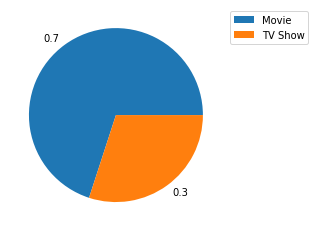

In [85]:
plt.pie(type, labels = type.values)
plt.legend(type.index, bbox_to_anchor= (1,1))
plt.show()